In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import re
import seaborn as sns
sns.set_theme()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9408\1866599446.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<AxesSubplot: >

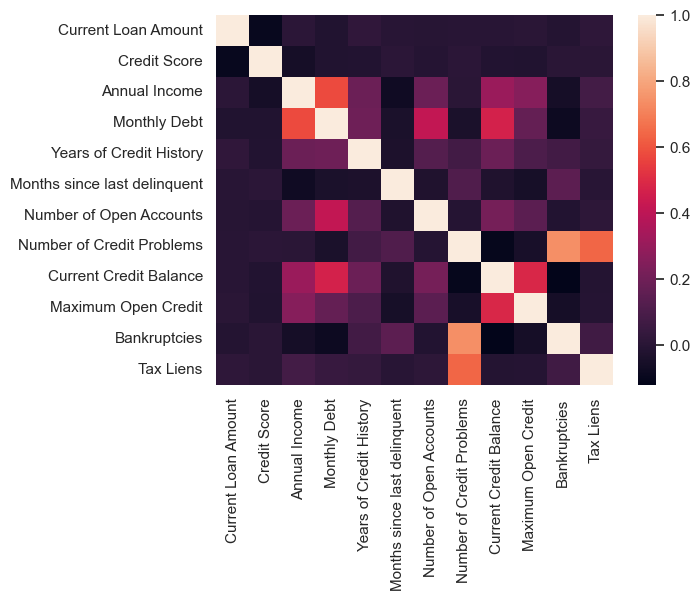

In [3]:
dataset = pd.read_csv('./flagged/credit_score_predict.csv')
dataset.head(20)
sns.heatmap(dataset.corr())

In [4]:
#Data cleaning
dataset_2 = dataset.drop(['Loan ID', 'Customer ID', 'Months since last delinquent'], axis = 'columns')
dataset_2['Years in current job'].unique()

array(['10+ years', '2 years', '1 year', '< 1 year', '5 years', '7 years',
       '3 years', '6 years', '8 years', '4 years', nan, '9 years'],
      dtype=object)

In [5]:
dataset_3 = dataset_2.copy()
dataset_3 = dataset_2.dropna()
#removing character values
dataset_3['refined_jobYears'] = dataset_2['Years in current job'].apply( lambda x: (''.join(filter(str.isdigit, str(x)))))
#extracting integers
dataset_3['refined_jobYears'] = dataset_3['refined_jobYears'].apply( lambda x: int(x))

C:\Users\Dell\AppData\Local\Temp\ipykernel_9408\548593778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3['refined_jobYears'] = dataset_2['Years in current job'].apply( lambda x: (''.join(filter(str.isdigit, str(x)))))
C:\Users\Dell\AppData\Local\Temp\ipykernel_9408\548593778.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3['refined_jobYears'] = dataset_3['refined_jobYears'].apply( lambda x: int(x))


In [6]:
dataset_3['refined_jobYears'].unique()

array([10,  2,  1,  5,  7,  3,  6,  8,  4,  9], dtype=int64)

In [7]:
dataset_4 = dataset_3.replace(to_replace = ['HaveMortgage'], value = ['Home Mortgage'])
dataset_4['Home Ownership'].unique()
dataset_4.rename(columns = {'Credit Score' : 'Credit_Score','Current Credit Balance' : 'Current_Credit_Balance', 'Maximum Open Credit' : 'Maximum_Open_Credit' ,'Current Loan Amount' : 'Current_Loan_Amount', 'Annual Income' : 'Annual_income', 'Monthly Debt' : 'Monthly_Debt', 'Years of Credit History' : 'Years_of_Credit_History', 'Number of Open Accounts' : 'Number_of_Open_Accounts', 'Number of Credit Problems' : 'Number_of_Credit_Problems', 'Home Ownership' : 'Home_Ownership', 'Tax Liens' : 'Tax_Liens'}, inplace = True)
dataset_4.head(10)

,Current_Loan_Amount,Term,Credit_Score,Annual_income,Years in current job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,refined_jobYears
0,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,9,0,621908,1058970,0.0,0.0,10
1,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,11,0,679573,904442,0.0,0.0,10
2,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10,0,38532,388036,0.0,0.0,2
3,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,16,1,156940,531322,1.0,0.0,10
4,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,14,0,359765,468072,0.0,0.0,10
5,202928,Short Term,741.0,760380.0,1 year,Rent,Debt Consolidation,6526.69,13.8,6,0,258647,476872,0.0,0.0,1
6,621786,Long Term,733.0,1783606.0,10+ years,Home Mortgage,Debt Consolidation,36563.98,15.3,42,0,281599,1449162,0.0,0.0,10
8,202466,Short Term,736.0,1068617.0,5 years,Rent,Debt Consolidation,18745.21,20.5,2,0,0,0,0.0,0.0,5
9,266288,Long Term,683.0,2031518.0,2 years,Rent,Debt Consolidation,12443.10,24.4,8,2,31445,251130,2.0,0.0,2
11,258104,Short Term,723.0,1284514.0,7 years,Rent,Debt Consolidation,6368.99,14.6,12,0,128402,266904,0.0,0.0,7


In [8]:
dataset_5 = dataset_4.replace(to_replace = ['other', 'major_purchase', 'Home Improvements', 'vacation', 'wedding', 'Take a Trip', 'moving', 'small_business'], value = ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Business Loan'])
dataset_5.head(10)

,Current_Loan_Amount,Term,Credit_Score,Annual_income,Years in current job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,refined_jobYears
0,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,9,0,621908,1058970,0.0,0.0,10
1,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,11,0,679573,904442,0.0,0.0,10
2,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10,0,38532,388036,0.0,0.0,2
3,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,16,1,156940,531322,1.0,0.0,10
4,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,14,0,359765,468072,0.0,0.0,10
5,202928,Short Term,741.0,760380.0,1 year,Rent,Debt Consolidation,6526.69,13.8,6,0,258647,476872,0.0,0.0,1
6,621786,Long Term,733.0,1783606.0,10+ years,Home Mortgage,Debt Consolidation,36563.98,15.3,42,0,281599,1449162,0.0,0.0,10
8,202466,Short Term,736.0,1068617.0,5 years,Rent,Debt Consolidation,18745.21,20.5,2,0,0,0,0.0,0.0,5
9,266288,Long Term,683.0,2031518.0,2 years,Rent,Debt Consolidation,12443.10,24.4,8,2,31445,251130,2.0,0.0,2
11,258104,Short Term,723.0,1284514.0,7 years,Rent,Debt Consolidation,6368.99,14.6,12,0,128402,266904,0.0,0.0,7


In [9]:
#creating dummies to handle strings
dummies = pd.get_dummies(dataset_5.Home_Ownership)
dummies2 = pd.get_dummies(dataset_5.Term)
dataset_6 = pd.concat([dataset_5, dummies, dummies2], axis = 'columns')
dataset_7 = dataset_6.drop(['Years in current job', 'Home_Ownership', 'Purpose', 'Rent', 'Term', 'Short Term'], axis = 'columns')
dataset_7.rename(columns = {'Home Mortgage' : 'Home_Mortgage', 'Own Home' : 'Own_Home', 'Long Term' : 'Long_Term'})
dataset_7.dropna()

,Current_Loan_Amount,Credit_Score,Annual_income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,refined_jobYears,Home Mortgage,Own Home,Long Term
0,611314,747.0,2074116.0,42000.83,21.8,9,0,621908,1058970,0.0,0.0,10,1,0,0
1,266662,734.0,1919190.0,36624.40,19.4,11,0,679573,904442,0.0,0.0,10,1,0,0
2,153494,709.0,871112.0,8391.73,12.5,10,0,38532,388036,0.0,0.0,2,0,0,0
3,176242,727.0,780083.0,16771.87,16.5,16,1,156940,531322,1.0,0.0,10,0,0,0
4,321992,744.0,1761148.0,39478.77,26.0,14,0,359765,468072,0.0,0.0,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,442596,739.0,1528968.0,19494.38,16.7,11,0,419235,656876,0.0,0.0,7,1,0,0
9995,157806,731.0,1514376.0,4795.41,12.5,9,0,87058,234410,0.0,0.0,6,0,0,0
9996,132550,718.0,763192.0,12401.87,9.9,8,0,74309,329692,0.0,0.0,4,1,0,0
9998,99999999,721.0,972097.0,12232.20,16.8,8,1,184984,240658,0.0,0.0,10,1,0,0


<AxesSubplot: >

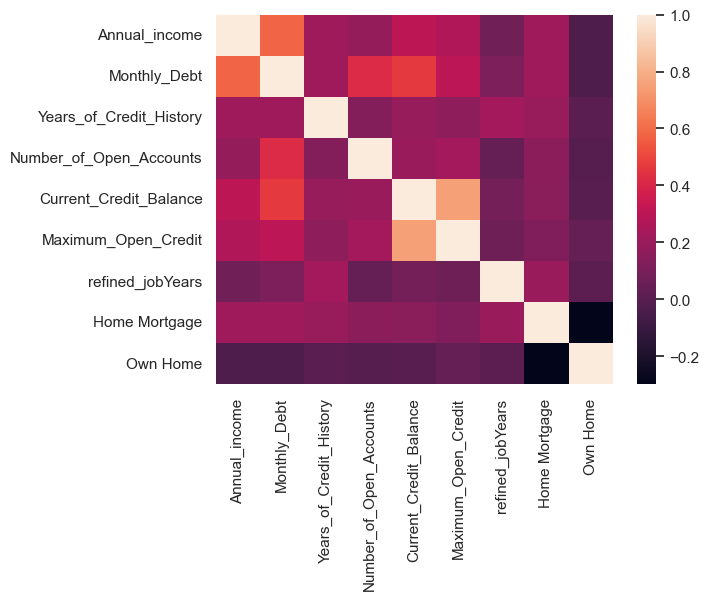

In [12]:
Final_Mapping = dataset_7.drop(['Number_of_Credit_Problems', 'Long Term', 'Credit_Score', 'Current_Loan_Amount', 'Bankruptcies', 'Tax_Liens'], axis = 'columns')
sns.heatmap(X.corr())

In [13]:
#Data Training and filter data that does not affect trained output

X = dataset_7.drop(['Maximum_Open_Credit','Number_of_Credit_Problems', 'Long Term', 'Credit_Score', 'Current_Loan_Amount', 'Bankruptcies', 'Tax_Liens'], axis = 'columns')
Y = dataset_7.Maximum_Open_Credit
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 15)
LR = LinearRegression()
LR.fit(X_train, Y_train)
LR.score(X_test, Y_test)
# cv = ShuffleSplit(n_splits = 2, test_size = 0.15, random_state = 15)
# cross_val_score(LinearRegression(), X, Y, cv = cv)

0.864211462459817

In [10]:
#writing function for data prediction
def predict_credit_limit (Ownership, Annual_Income, Monthly_Debt, Years_of_Credit_History, Number_of_Open_Accounts, Current_Credit_Balance, refined_jobYears):
  ownership_index = np.where(X.columns == Ownership)[0]
  x = np.zeros(len(X.columns))
  
  x[0] = Annual_Income
  x[1] = Monthly_Debt
  x[2] = Years_of_Credit_History
  x[3] = Number_of_Open_Accounts
  x[4] = Current_Credit_Balance
  x[5] = refined_jobYears
  
  if ownership_index >= 0:
    x[ownership_index] = 1
  
  return LR.predict([x])[0]

In [16]:
#rechecking answers
predict_credit_limit('Own_Home', 2074116, 42000.83, 21.8, 9, 621908, 10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12184\2040192235.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ownership_index >= 0:
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


967180.5041892993

In [ ]:
# import pickle
# with open('Credit_limit_model.pickle', 'wb') as f:
#   pickle.dump(LR, f)

In [ ]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json", "w") as f:
#   f.write(json.dumps(columns))

In [ ]:
# Hyperparameter Tuning
# from sklearn.linear_model import Lasso 
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# cv = ShuffleSplit(n_splits = 5, test_size = 0.1, random_state = 0)

# def find_best_model_using_gridsearchcv(X,Y):
#   algos = {
#     'linear regression' : {
#       'model': LinearRegression(), 
#         'params': {
#           'normalize': [True, False]
#         }
#     },
#     'lasso':{
#       'model': Lasso(),
#       'params': {
#         'alpha': [1,2],
#         'selection': ['random', 'cyclic']
#       }
#     },
#     'decision tree': { 
#       'model': DecisionTreeRegressor(),
#       'params': {
#         'criterion': ['mse', 'friedman_mse'],
#         'splitter': ['best','random']
#       }
#     }
#   }
#   scores = []
#   for algo_name, config in algos.items():
#     gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=True)
#     gs.fit(X,Y)
#     scores.append({
#       'model': algo_name,
#       'best score': gs.best_score_,
#       'best_params': gs.best_params_
#     })
#     return pd.DataFrame(scores, columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(X,Y)